In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/supermarket_sales.csv')

In [ ]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/supermarket_sales.csv'

df = pd.read_csv(file_path)

print(df.head())

missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")
df_cleaned = df.dropna()

print(df_cleaned.describe())

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

duplicates = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Duplicate rows: {duplicates}")
print(df_cleaned.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gros

In [ ]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


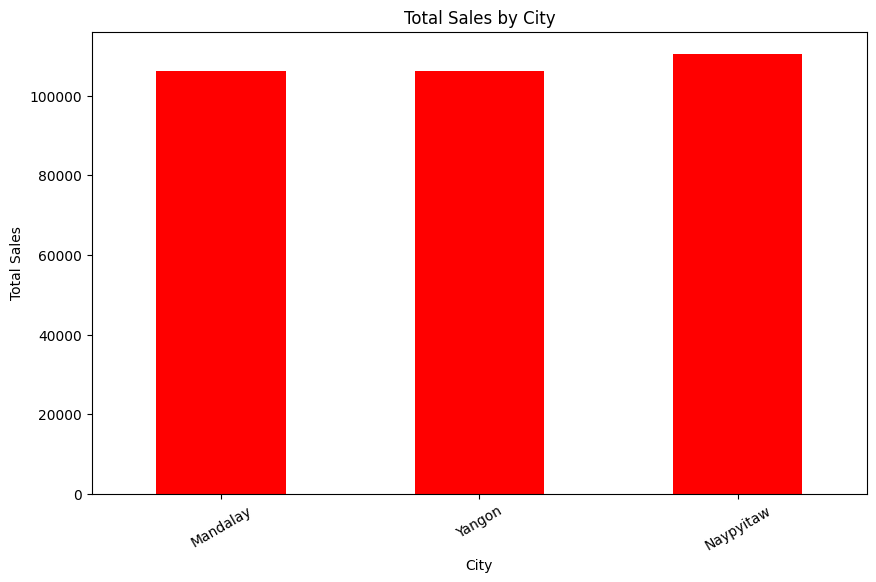

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
city_sales = df.groupby('City')['Total'].sum().sort_values()
city_sales.plot(kind='bar', color='red')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.show()


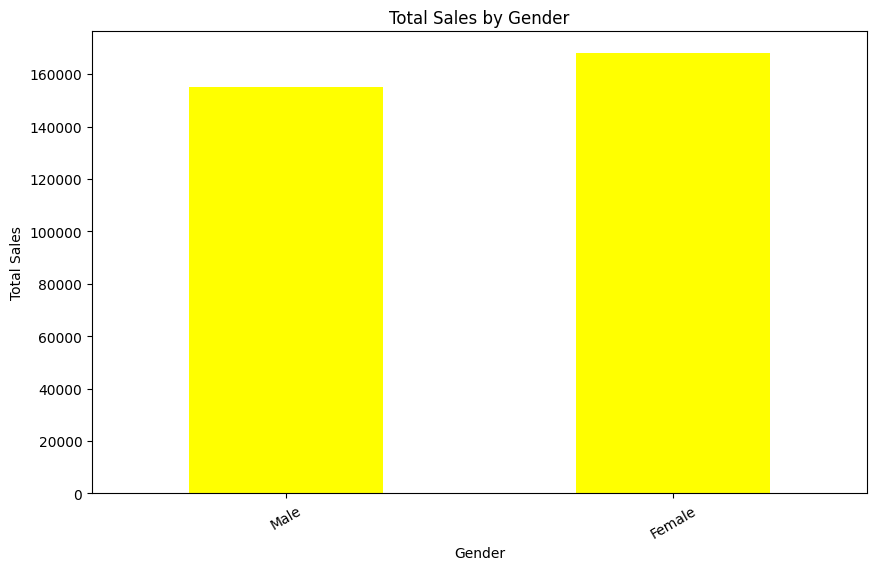

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
Gender = df.groupby('Gender')['Total'].sum().sort_values()
Gender.plot(kind='bar', color='yellow')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.show()

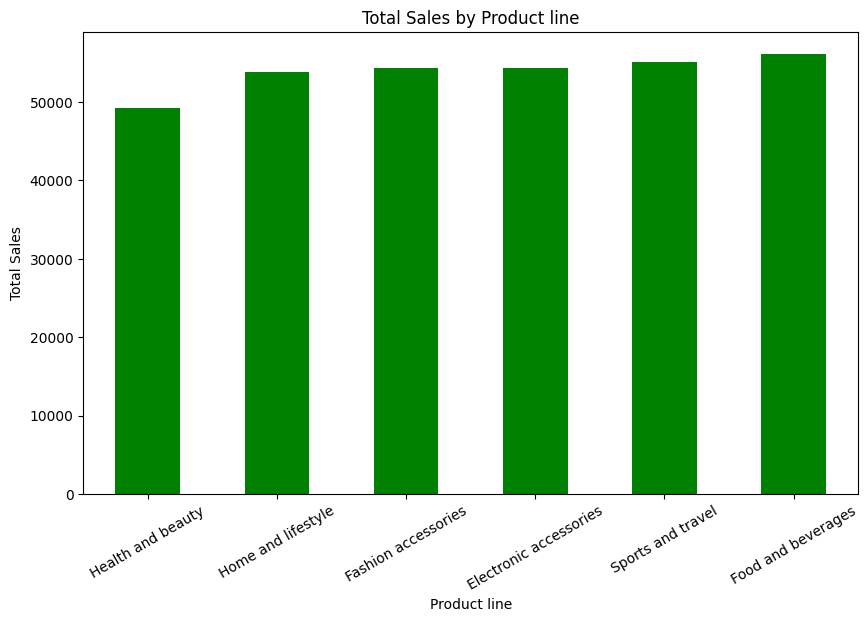

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
city_sales = df.groupby('Product line')['Total'].sum().sort_values()
city_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Product line')
plt.xlabel('Product line')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.show()

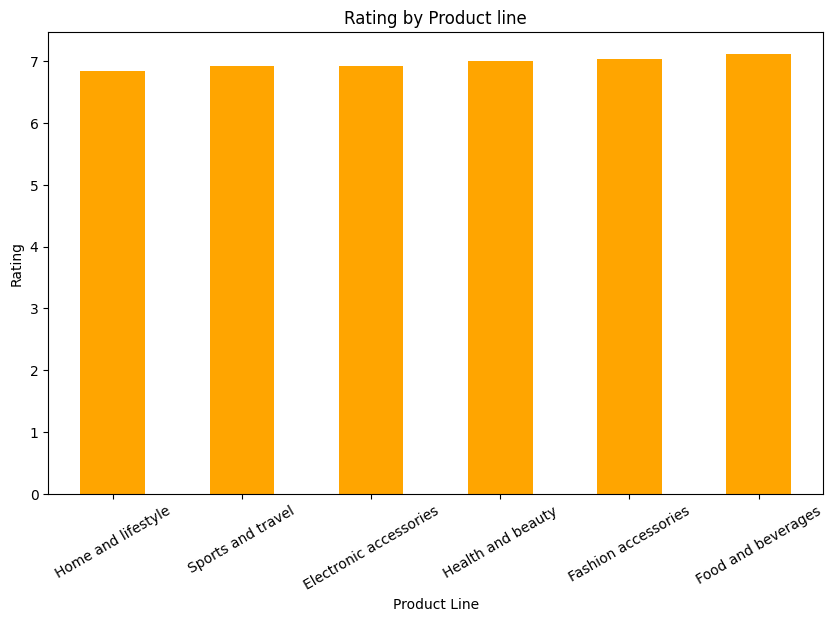

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
rating = df.groupby('Product line')['Rating'].mean().sort_values()
rating.plot(kind='bar', color='orange')
plt.title('Rating by Product line')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=30)
plt.show()

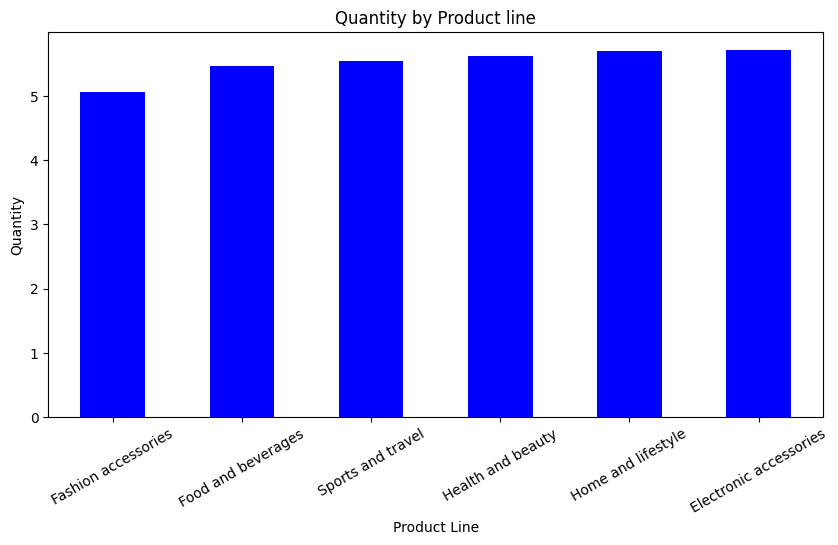

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
Quantity = df.groupby('Product line')['Quantity'].mean().sort_values()
Quantity.plot(kind='bar', color='blue')
plt.title('Quantity by Product line')
plt.xlabel('Product Line')
plt.ylabel('Quantity')
plt.xticks(rotation=30)
plt.show()

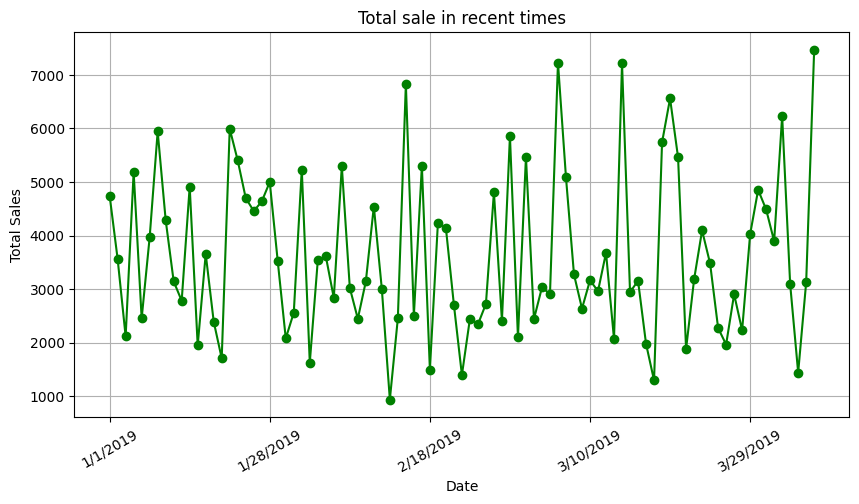

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
date_sale = df.groupby('Date')['Total'].sum()
date_sale.plot(kind = 'line', marker = 'o' , linestyle = '-' , color = 'green')
plt.title('Total sale in recent times')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

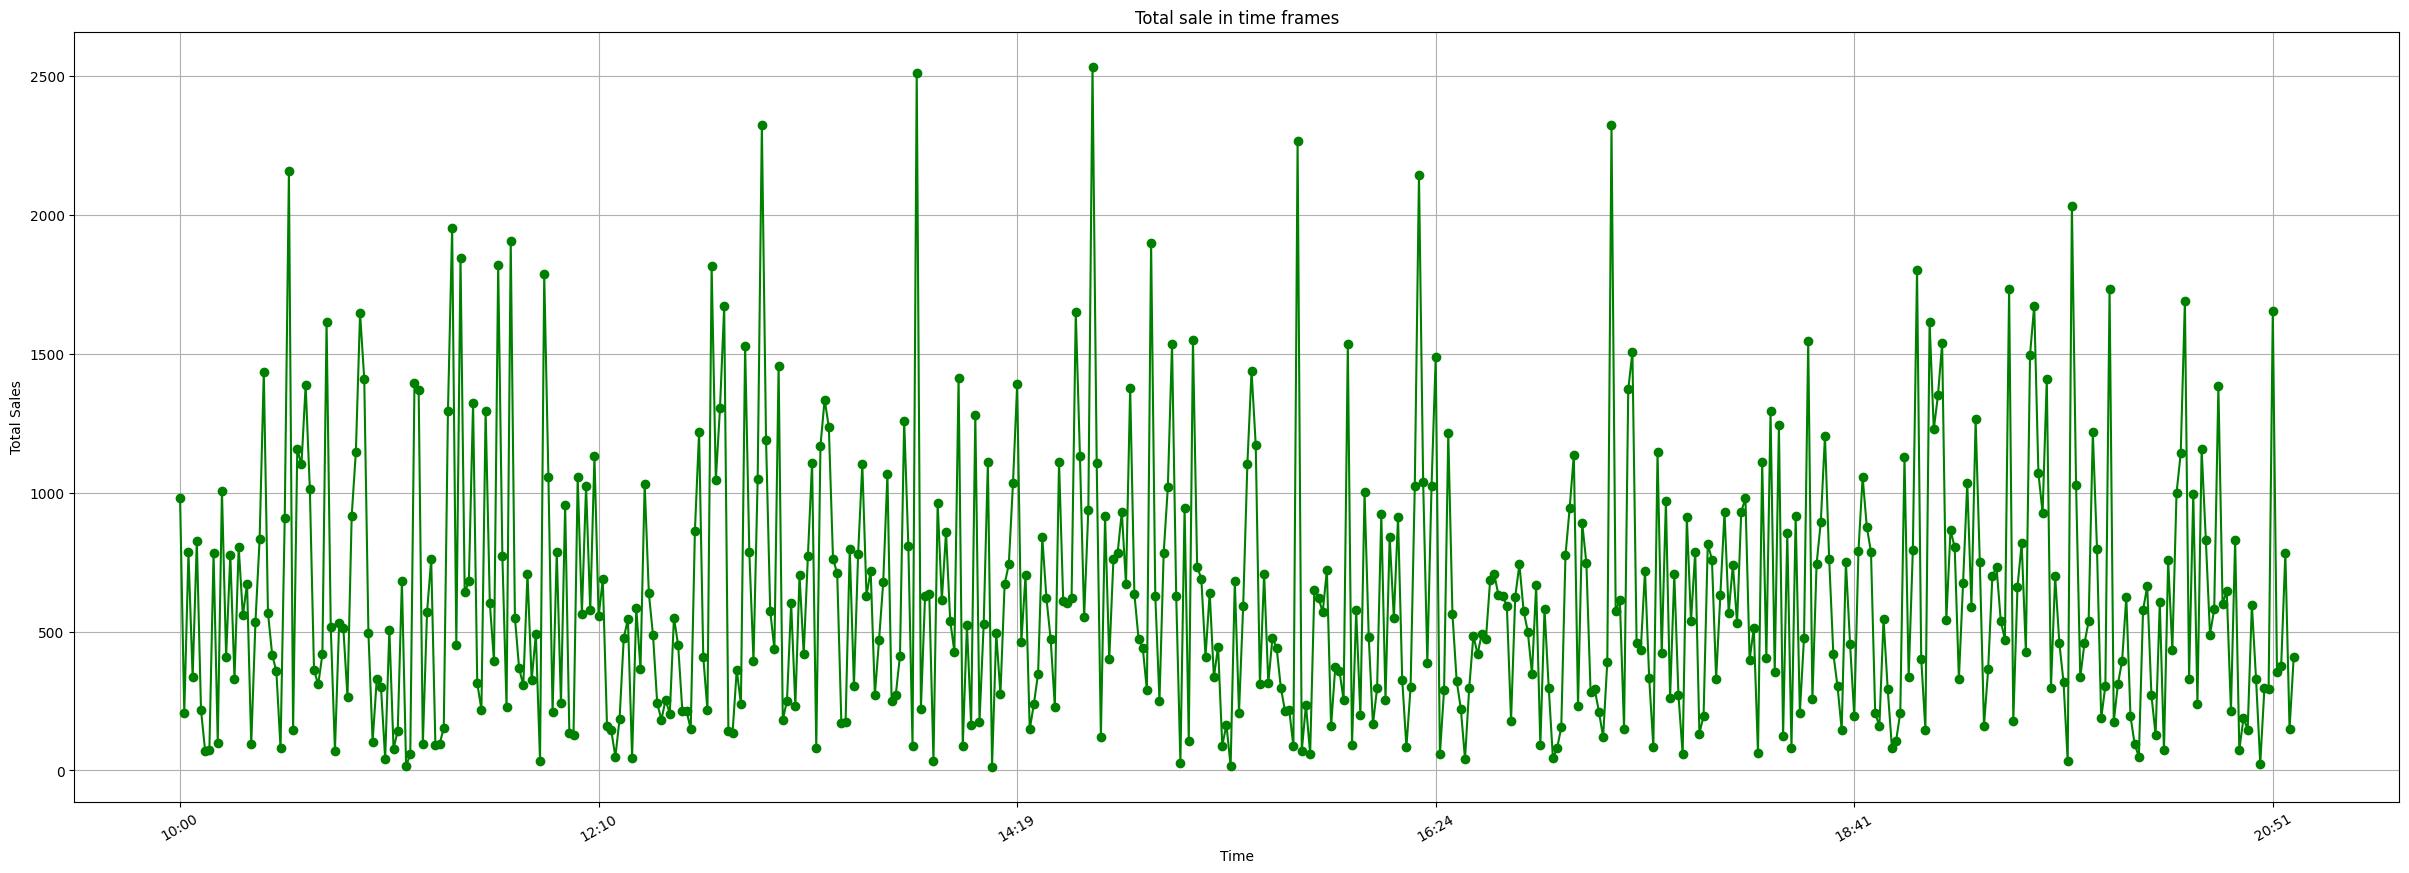

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
time_sale = df.groupby('Time')['Total'].sum()
time_sale.plot(kind = 'line', marker = 'o' , linestyle = '-' , color = 'green')
plt.title('Total sale in time frames')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/My Drive/supermarket_sales.csv')

print(data.info())
print(data.head())

data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

label_encoders = {}
for column in ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

features = data.drop(columns=['Invoice ID', 'Date', 'Time', 'Total'])
target = data['Total']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

new_sample = pd.DataFrame({
    'Branch': [0],
    'City': [1],
    'Customer type': [1],
    'Gender': [0],
    'Product line': [3],
    'Unit price': [100],
    'Quantity': [5],
    'Tax 5%': [25],
    'Payment': [1],
    'cogs': [500],
    'gross margin percentage': [4.76],
    'gross income': [25],
    'Rating': [7.4],
    'Year': [2024],
    'Month': [8],
    'Day': [10]
})

future_sales = model.predict(new_sample)
print(f'Predict future sales: {future_sales[0]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  